In [221]:
import numpy as np
import pandas as pd
import seaborn as sns

In [222]:
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg (3).csv


In [223]:
import io

In [224]:
df = pd.read_csv(io.BytesIO(uploaded['fake_reg.csv']))

In [225]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


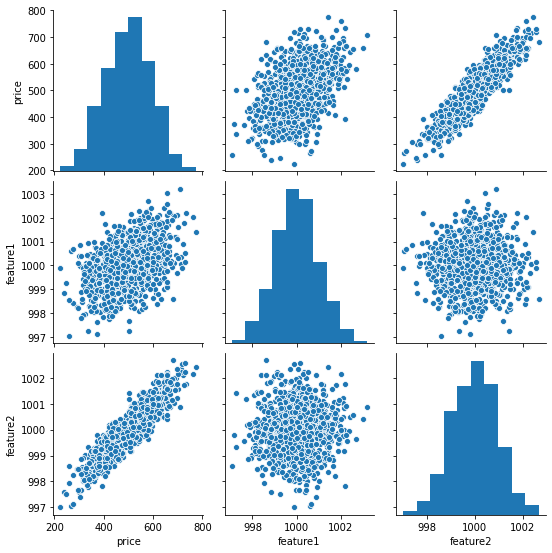

In [226]:
sns.pairplot(df)

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X = df[['feature1','feature2']].values

In [229]:
y = df[['price']].values

In [230]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [231]:
X_train.shape

(700, 2)

In [232]:
X_test.shape

(300, 2)

In [233]:
from sklearn.preprocessing import MinMaxScaler

In [234]:
scaler2 = MinMaxScaler()

In [235]:
scaler2.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [236]:
X_train = scaler2.transform(X_train)

In [71]:
#scaler.fit(X_test)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [237]:
X_test = scaler2.transform(X_test)

In [238]:
X_train.max()

1.0

In [239]:
X_train.min()

0.0

In [240]:
X_test.max()

1.0186515935232023

In [241]:
X_test.min()

-0.014108392024496652

In [252]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet built

In [253]:
model3 = Sequential()

In [254]:
model3.add(Dense(4,activation='relu'))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(4,activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='rmsprop',loss='mse')

In [255]:
model3.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256761.8750
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256603.9375
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256450.9062
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256288.0938
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256100.5469
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 255885.4844
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255639.6406
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255355.9531
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255033.6250
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 254666.5625
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254261.5156
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [256]:
model3.history.history

{'loss': [256761.875,
  256603.9375,
  256450.90625,
  256288.09375,
  256100.546875,
  255885.484375,
  255639.640625,
  255355.953125,
  255033.625,
  254666.5625,
  254261.515625,
  253820.1875,
  253337.671875,
  252814.578125,
  252246.671875,
  251630.359375,
  250958.234375,
  250227.34375,
  249427.34375,
  248550.703125,
  247598.28125,
  246564.578125,
  245447.171875,
  244243.015625,
  242944.359375,
  241549.25,
  240047.5625,
  238446.171875,
  236739.515625,
  234910.625,
  232962.609375,
  230888.875,
  228677.984375,
  226359.421875,
  223888.484375,
  221280.703125,
  218527.0625,
  215637.46875,
  212598.421875,
  209417.4375,
  206071.546875,
  202555.546875,
  198893.484375,
  195068.234375,
  191083.578125,
  186934.203125,
  182638.15625,
  178181.421875,
  173565.296875,
  168788.75,
  163848.125,
  158749.265625,
  153523.6875,
  148162.28125,
  142648.046875,
  137013.5,
  131276.09375,
  125406.8671875,
  119450.046875,
  113401.6953125,
  107261.109375,
  10

In [257]:
loss_df = pd.DataFrame(model3.history.history)

In [258]:
loss_df.head()

,loss
0,256761.875000
1,256603.937500
2,256450.906250
3,256288.093750
4,256100.546875


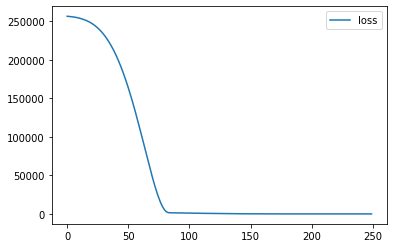

In [259]:
loss_df.plot()

In [260]:
model3.evaluate(X_test,y_test,verbose=0)

25.986433029174805

In [261]:
model3.evaluate(X_train,y_train,verbose=0)

24.068891525268555

In [262]:
test_predictions = model3.predict(X_test)

In [263]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [264]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [265]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [266]:
pred_df.columns=['Test True Y','Model Predictions']

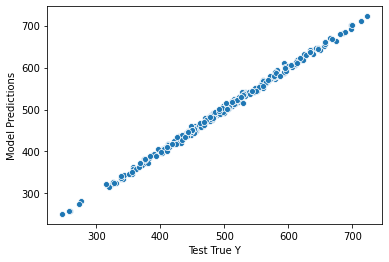

In [267]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [268]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [269]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.122004734202613

In [270]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

25.98644561910387

In [271]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.097690223925329

In [272]:
new_gem = [[998,1000]]

In [273]:
new_gem = scaler2.transform(new_gem)

In [274]:
model3.predict(new_gem)

array([[420.3827]], dtype=float32)

In [275]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,406.005951
1,624.156198,624.672241
2,582.455066,593.216309
3,578.588606,573.234131
4,371.224104,367.207672


In [276]:
from tensorflow.keras.models import load_model

In [277]:
model3.save('my_gem_model.h5')

In [278]:
later_model = load_model('my_gem_model.h5')

In [279]:
later_model.predict(new_gem)

array([[420.3827]], dtype=float32)